<a href="https://colab.research.google.com/github/kevinbrnett/sales-predictions/blob/main/Sales_Predictions_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Predicitions
- Kevin Barnett
- 03/10/2023


## Data Dictionary
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or regular
- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of area in which the store is located
- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the target variable to be predicted.

## Import Libraries

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
set_config(display='diagram')

## Loading Data


In [76]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [78]:
# Create dataframe and see if data loaded correctly
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Question 1: How many rows and columns are there?
- There are 12 columns and 8523 rows

## Question 2: What are the datatypes of each variable?
- 'Item_Identifier' = 'object'
- 'Item_Weight' = 'float64'
- 'Item_Fat_Content' = 'object'
- 'Item_Visibility = 'float64'
- 'Item_Type = 'object'
- 'Item_MRP' = 'float64'
- 'Outlet_Identifier' = 'object'
- 'Outlet_Establishment_Year' = 'int64'
- 'Outlet_Size' = 'object'
- 'Outlet_Location_Type' = 'object'
- 'Outlet_Type' = 'object'
- 'Item_Oulet_Sales' = 'float64'

## Data Cleaning


In [79]:
# Check for any duplicates
df.duplicated().any()

False

> There are no duplicate values

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [81]:
# Identify any missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing rows of data in the 'Item_Weight' column
- There are 2410 missing rows of data in the 'Outlet_Size' column

In [82]:
print(df['Item_Weight'].isna().value_counts(normalize=True),'\n')
df['Outlet_Size'].isna().value_counts(normalize=True)

False    0.828347
True     0.171653
Name: Item_Weight, dtype: float64 



False    0.717236
True     0.282764
Name: Outlet_Size, dtype: float64

> In the 'Item_Weight" column, 17% of values are missing. In the 'Outlet_Size' column, 28% of the values are missing

In [83]:
# Impute the mean of item weights for missing data
df['Item_Weight'].fillna( value = df['Item_Weight'].mean(), inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> To resolve missing data in the 'Item_Weight' column the mean of the column was put in place for the missing values. This was done since there was no way to actually know what the item weights

In [84]:
# Check number of unique values for the Outlet_Size column
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [85]:
# Impute 'Medium' for missing data
df['Outlet_Size'].fillna(value = 'Medium', inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

> To resolve the missing data in the 'Outlet_Size' column 'Medium' was put in place for the missing data. This was done since 'Medium' was over 50% of the data in the column

In [86]:
# Delete Unnecessary Columns
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


> The 'Item_Identifier' and 'Outler_Identifier' columns were deleted since they were unique values.

In [87]:
# Check columns for inconsistencies in data values in the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [88]:
# Replace 'LF', 'low fat' with 'Low Fat' and 'reg' with 'Regular' 
df.replace({'LF': 'Low Fat','reg': 'Regular','low fat': 'Low Fat'}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [89]:
# Check columns for inconsistencies in data values in the 'Item_Type' column
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [90]:
# Check columns for inconsistencies in data values in the 'Outlet_Size' column
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [91]:
# Change 'High' value to 'Large' as it makes more sense in this case
df.replace({'High':'Large'}, inplace=True)
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [92]:
# Check columns for inconsistencies in data values in the 'Outlet_Establishment_Year' column
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

> The only column that had inconsistencies was the 'Item_Fat_Content' column. The data values were replaced to make the data consistent

In [93]:
# Display summary of the statistics and check for impossible values
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals


In [94]:
# Show the information for the data frame again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


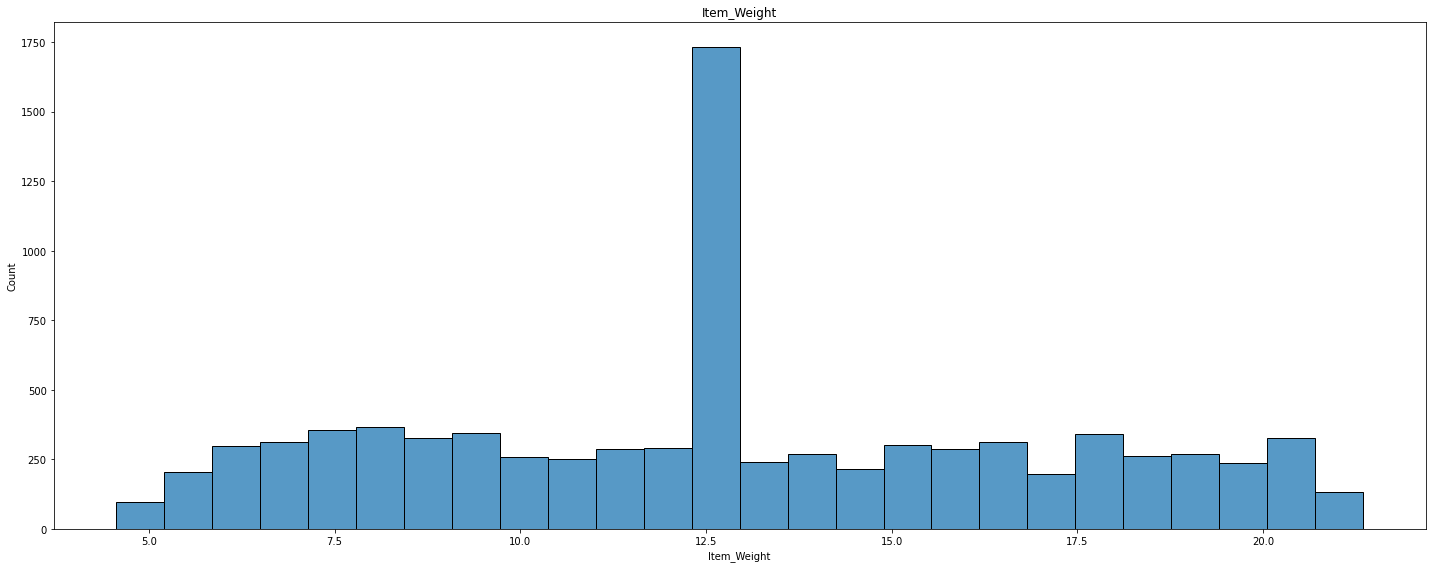

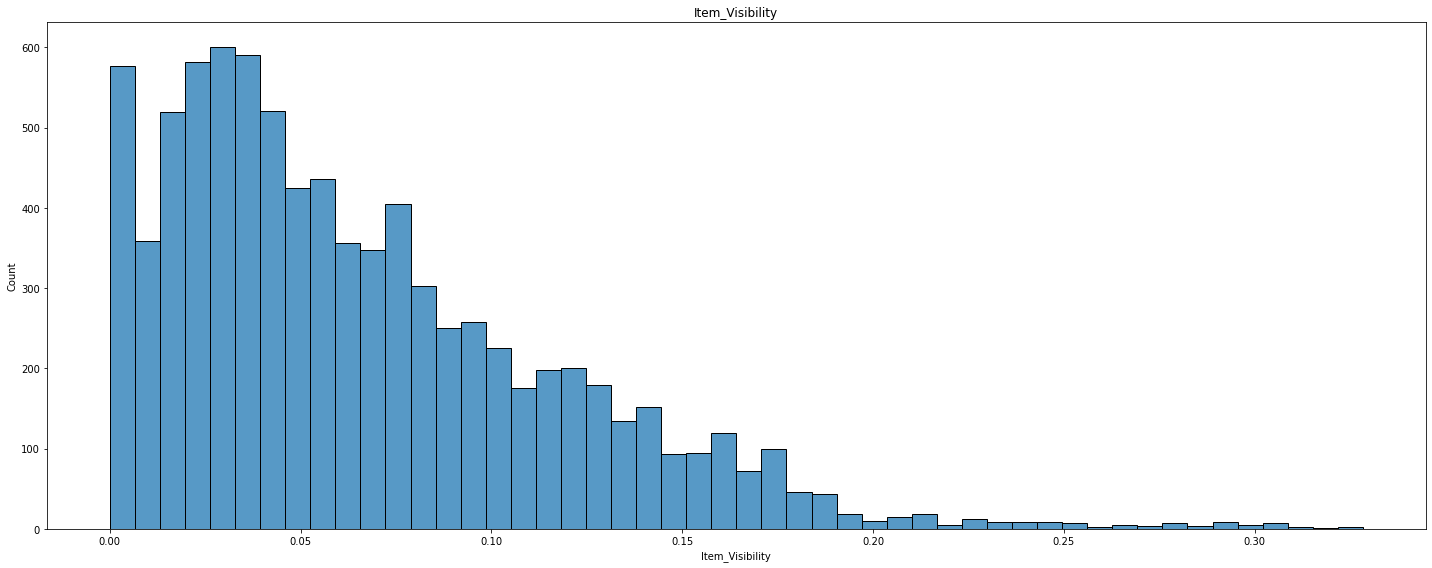

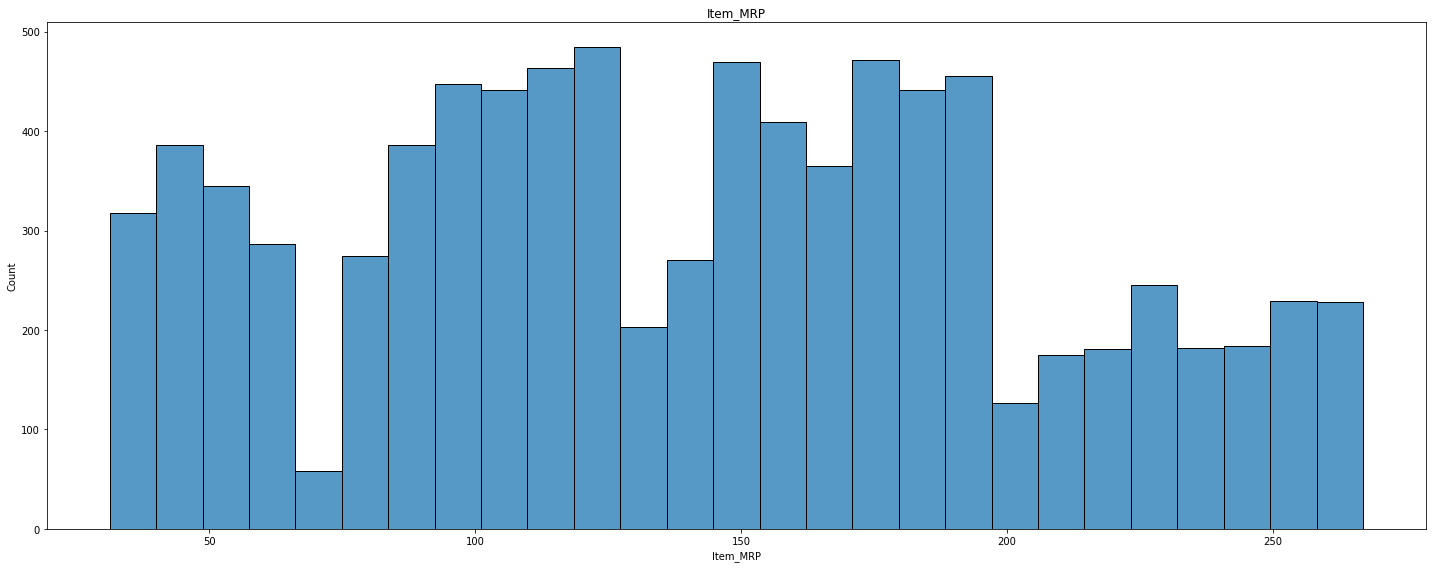

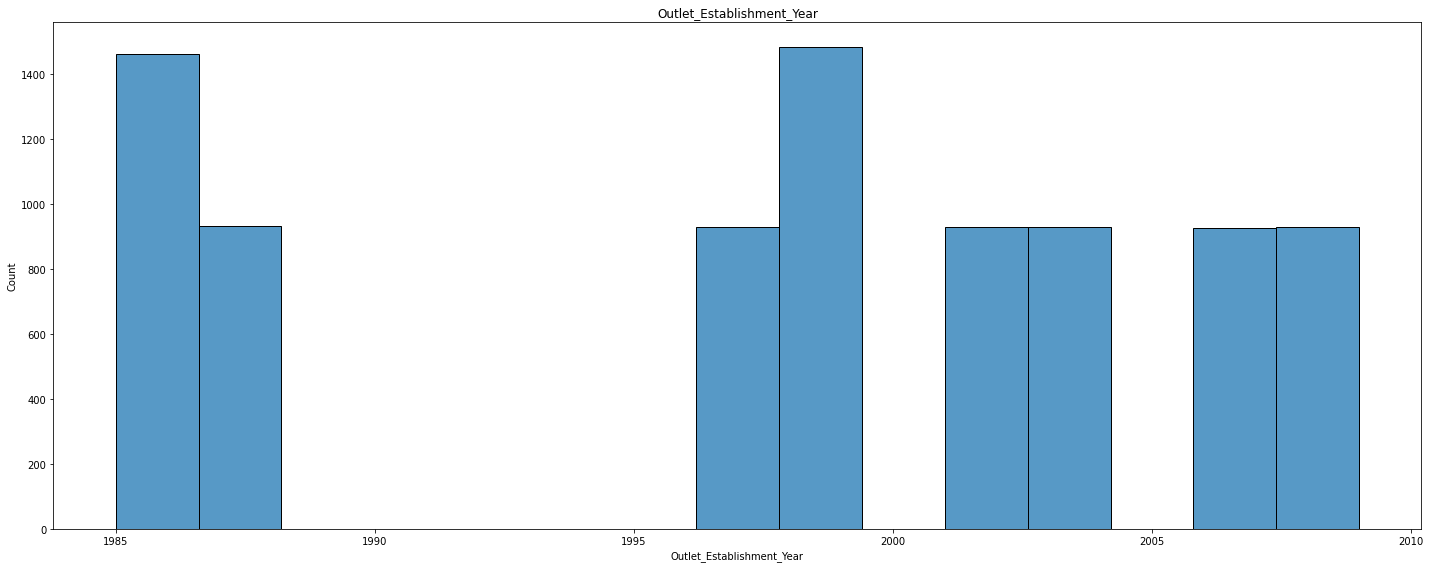

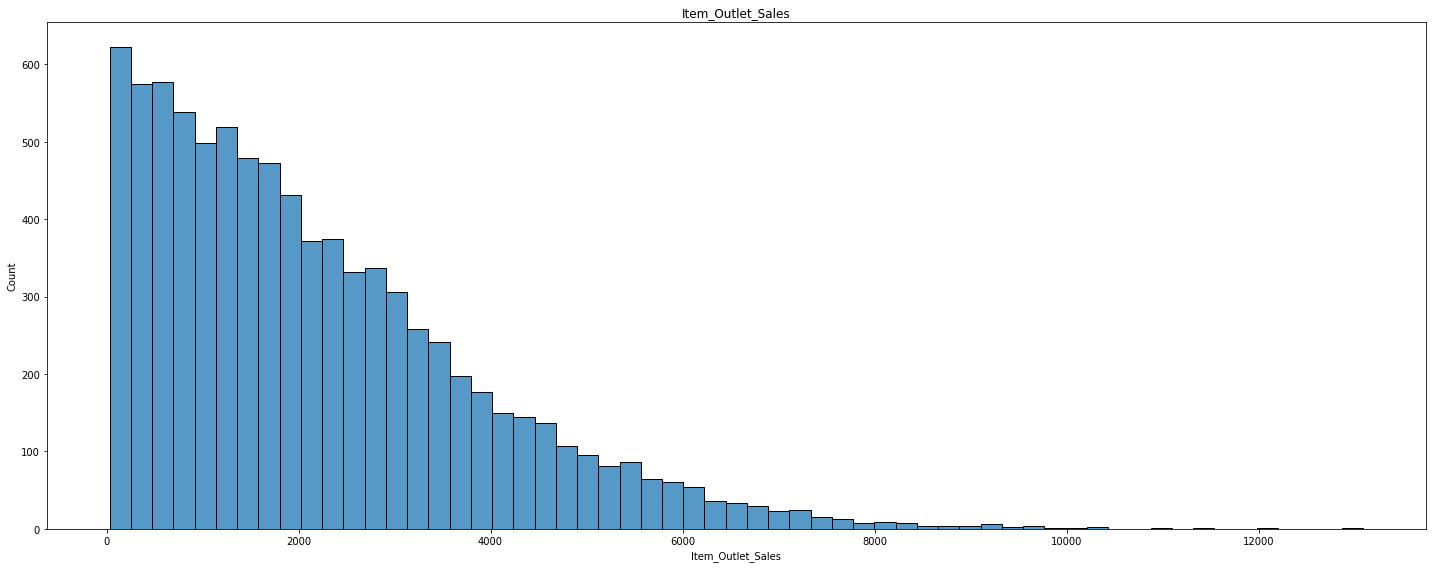

In [95]:
# Create for loop to create histograms for numeric features
# Create variable to select numeric columns
num_columns = df.select_dtypes('number')

for column in num_columns:
  plt.figure(figsize = (20, 8))
  plt.title(column)
  sns.histplot(x = df[column])

  # Display visualizations
  plt.tight_layout()
  plt.show()

> We can see that the data for item sales and visibility are both skewed to the right. Both of these features also have a significant amount of outliers. With the item MRP, item weight, and establishment year features there does not seem to be a pattern in the histogram.

In [96]:
# Create custom function to create EDA with barplots for categorical frequencies
# EDA to plot barplots
def bar_plot(data, x, y, size = (12, 8)):
  fig, ax = plt.subplots(figsize = size)
  # Count up categories and sort values
  count = df[x].value_counts().sort_values(ascending= False).to_frame()

  # Create barplot
  sns.barplot(data = count, x = count.index, y = count[x], ax = ax)
  plt.xticks(rotation = 75)
  ax.set_title(f'Categorical Frequencies of {y}')
  ax.set_xlabel(f'Categories for {y}')
  ax.set_ylabel(f'Counts')
  plt.tight_layout()

  return fig, ax

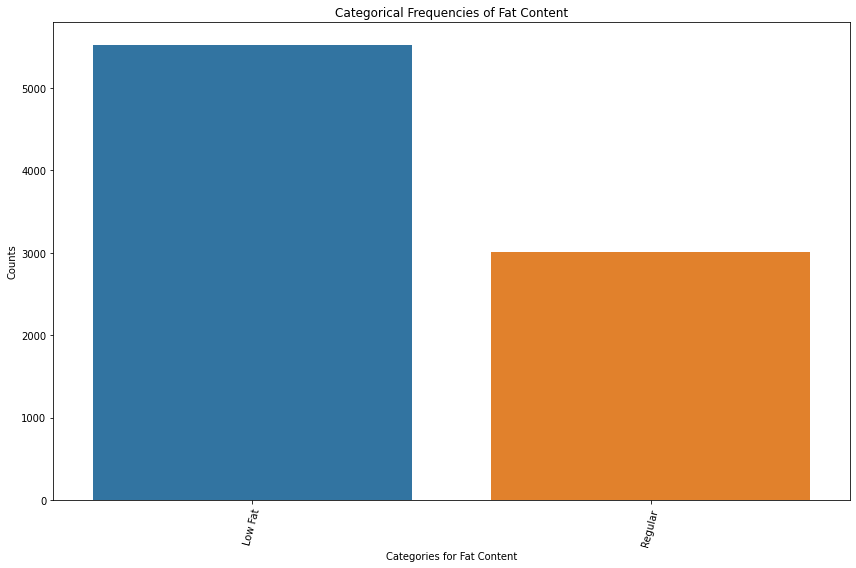

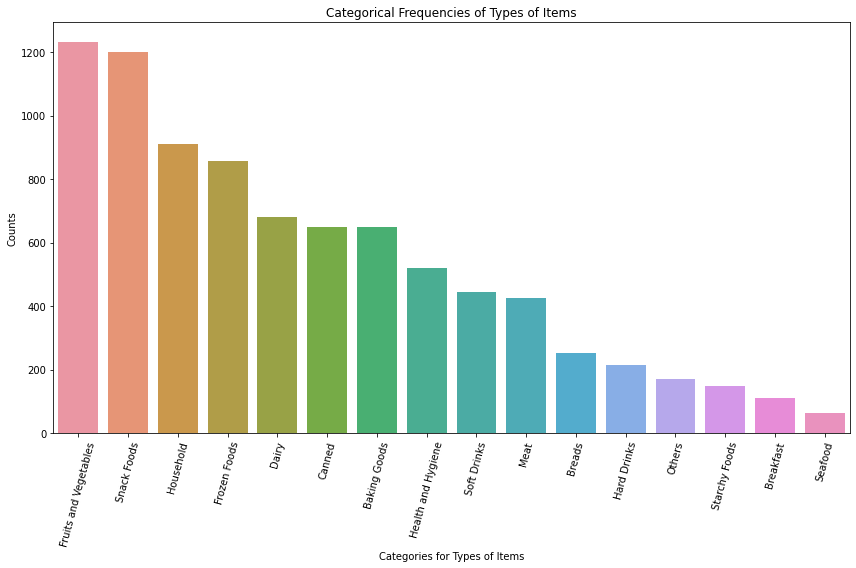

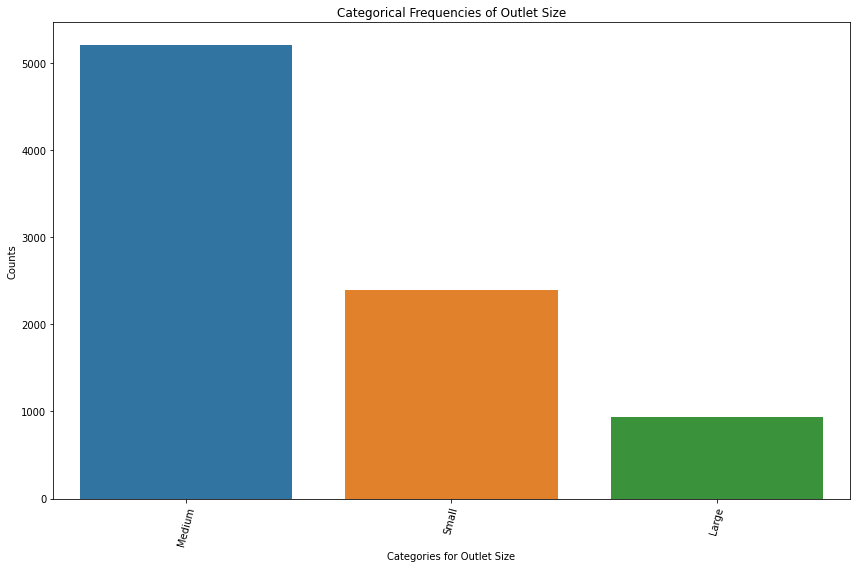

In [97]:
fig, ax = bar_plot(df, 'Item_Fat_Content', 'Fat Content');
fig, ax = bar_plot(df, 'Item_Type', 'Types of Items');
fig, ax = bar_plot(df, 'Outlet_Size', 'Outlet Size');

> Across all outlets there are 50% more low fat items

> We can see that across all outlets that the top 5 food types are fruits and vegetables, snack foods, household products, frozen foods, and dairy products

> There are more medium outlets than small and large outlets combined


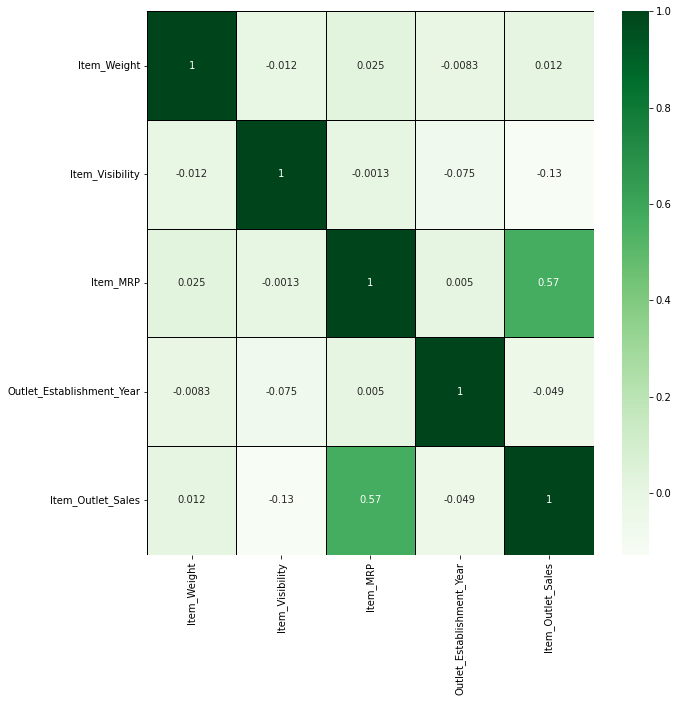

In [98]:
# Create heatmap to compare all features for correlation
# Adjust figure size
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', linewidths = 1, linecolor = 'Black');

> There seems to only be two features that are moderately correlated, item sales and MRP

## Explanatory Visuals

In [99]:
# Get data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


## 1. Do larger outlet sizes have more sales than smaller ones?

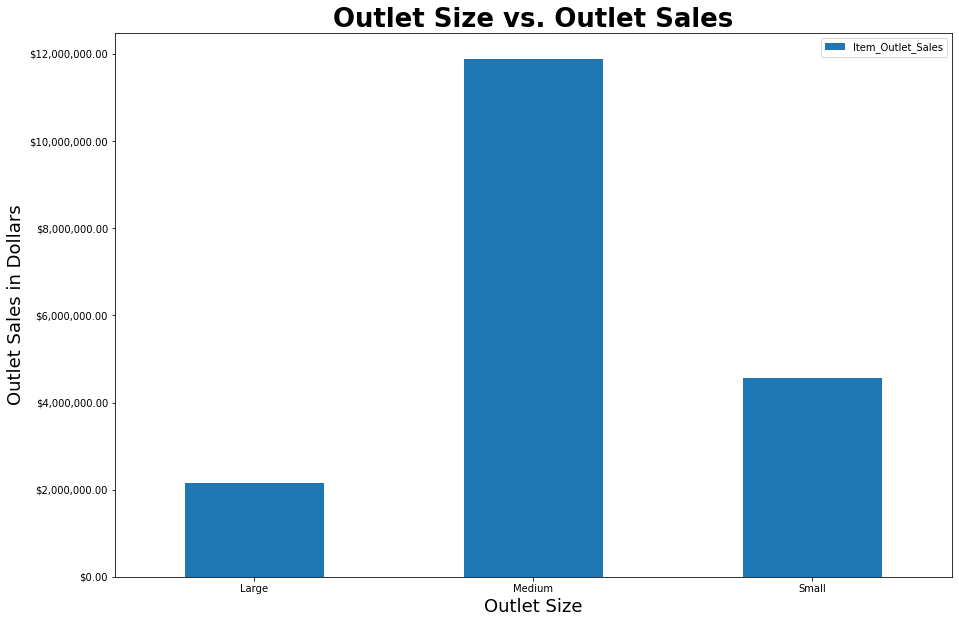

In [100]:
# Create barplot with outlet size as the x-axis and outlet sales as the y-axis
from matplotlib.ticker import FuncFormatter

# Group each outlet size and find the sum of the item sales
fig, sum_sales = plt.subplots(figsize = (15,10))
sum_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar()
sum_sales.set_title('Outlet Size vs. Outlet Sales', fontsize = 26, fontweight = 'bold')
sum_sales.set_xlabel('Outlet Size', fontsize = 18)
sum_sales.set_ylabel('Outlet Sales in Dollars', fontsize = 18)
sum_sales.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)

# Turn ylabels into millions of dollars
def millions(x, pos):
  return f'${x:,.2f}'

price_millions = FuncFormatter(millions)
sum_sales.yaxis.set_major_formatter(price_millions)


> We can see that medium size outlets account for a majority of sales. Another question we would now need to answer is: What is the ratio of sales per number of high, medium, and small outlets?

2. Do more recently established stores sell more items?

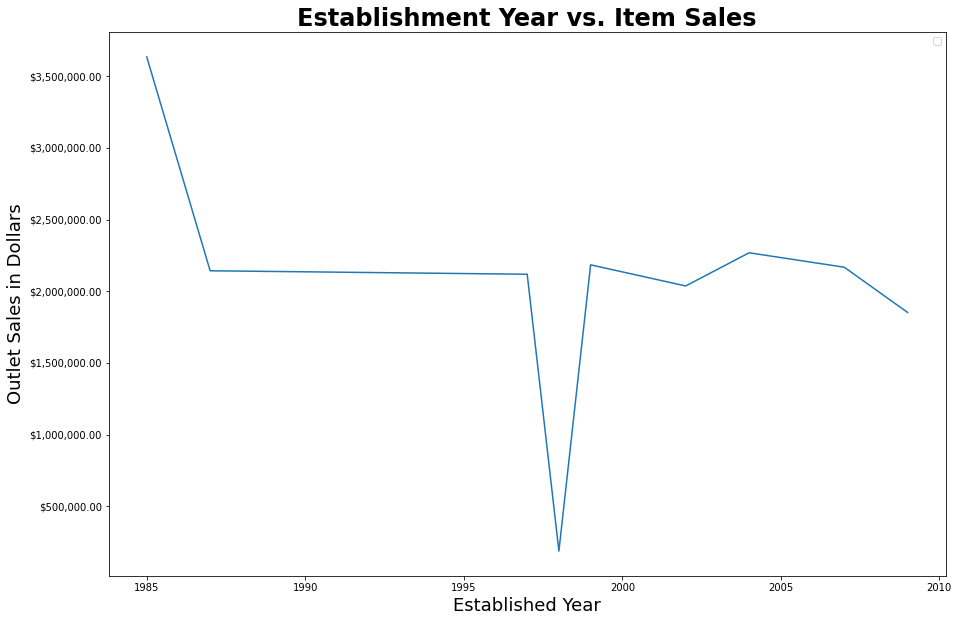

In [101]:
# Create lineplot to show the trend of Established Year vs. Sales
fig, ax = plt.subplots(figsize = (15, 10))

data = df.groupby('Outlet_Establishment_Year', as_index = False)['Item_Outlet_Sales'].sum()
ax = sns.lineplot(data = data, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales')
ax.set_title('Establishment Year vs. Item Sales', fontsize = 24, fontweight = 'bold')

ax.set_xlabel('Established Year', fontsize = 18)
ax.set_ylabel('Outlet Sales in Dollars', fontsize = 18)
ax.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)


# Turn ylabels into millions of dollars
def millions(x, pos):
  return f'${x:,.2f}'

price_millions = FuncFormatter(millions)
ax.yaxis.set_major_formatter(price_millions)


> This graph shows that stores that have been established more recenty earn less

# Machine Learning for Predictions

In [138]:
# Load uncleaned dataset to prevent data leakage
filename = ('/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv')
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [139]:
# Descriptive statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


> The columns that have a potential effect on item sales are 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', and 'Outlet_Size'
### Types of Data
- Numeric: 'Item_Visibility'
- Ordinal: 'Outlet_Size'
- Nominal: 'Item_Type' and 'Item_Fat_Content'

In [140]:
# Remove Uncessary Columns
df.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [141]:
# Remove any duplicated rows
df.drop_duplicates()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [142]:
# Check to make sure duplicates were removed
df.duplicated().sum()

0

In [143]:
# Check categorical data for inconsistencies
print(df['Item_Fat_Content'].value_counts(),'\n')
print(df['Item_Type'].value_counts(),'\n')
df['Outlet_Size'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 



Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

> In the 'Item_Fat_Content' column, Low Fat is written three different ways (Low Fat, low fat, LF). Regular is written two diffent ways (Regular, reg). These will be changed to be consistent as the data is prepared for OneHotEncoding

In [144]:
# Fix inconsistencies and prepare categorical data for OneHotEncoding
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True);
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [145]:
# Replace High value with Large
df['Outlet_Size'].replace({'High':'Large'}, inplace=True)

In [146]:
# Replace categorical values with numeric values for ordinal encoding
df['Outlet_Size'].replace({'Small':0,'Medium':1,'Large':2})

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [147]:
# Identify X features and y target
y = df['Item_Outlet_Sales']
X= df.drop(columns = 'Item_Outlet_Sales')

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Machine Learning Pipeline

In [112]:
# Instantiate column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [113]:
# Instantiate transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()

In [114]:
# Instantiate imputers
freq_imp = SimpleImputer(strategy='most_frequent')
mean_imp = SimpleImputer(strategy='mean')

In [115]:
# Instantiate pipelines
num_pipe = make_pipeline(mean_imp, scaler)
cat_pipe = make_pipeline(freq_imp, ohe)

In [116]:
# Instantiate column transformers
# Tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b715a9a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b7170aca0>)])

In [117]:
# Transform data
# Fit on training data
preprocessor.fit(X_train)

# Transform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [118]:
# Inspect results
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 32)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## Linear Regression Model

In [119]:
# Instantiate linear regression model
reg = LinearRegression()

In [120]:
# Instantiate pipeline
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b715a9a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b7170aca0>)])),
                ('linearregression', LinearRegression())])

In [121]:
# Fit model on training data
reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b715a9a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b7170aca0>)])),
                ('linearregression', LinearRegression())])

In [122]:
# Predictions for target values
train_predict = reg_pipe.predict(X_train)
test_predict = reg_pipe.predict(X_test)

In [123]:
# Calculate regression metics
# Mean Absolute Error
train_MAE = np.mean(np.abs(train_predict - y_train))
test_MAE = np.mean(np.abs(test_predict - y_test))

# Mean Squared Error
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

# Root Mean Squared
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# R2 Score
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

# Display metrics to compare
print(f'Model training MAE: {train_MAE}')
print(f'Model testing MAE: {test_MAE}')
print('\n')
print(f'Model training MSE: {train_mse}')
print(f'Model testing MSE: {test_mse}')
print('\n')
print(f'Model training RMSE: {train_rmse}')
print(f'Model testing RMSE: {test_rmse}')
print('\n')
print(f'Model training R2: {train_r2}')
print(f'Model testing R2: {test_r2}')

Model training MAE: 847.1774916466977
Model testing MAE: 803.9766285200787


Model training MSE: 1298631.8580948587
Model testing MSE: 1194496.0878343699


Model training RMSE: 1139.5752972466798
Model testing RMSE: 1092.9300470910157


Model training R2: 0.5611923313774996
Model testing R2: 0.5670511340874516


> The R2 score on this model is significantly low and on average the model is off by 75%. This model would not be good to use for predictions.

## Regression Tree Model

In [124]:
# Create Model instance
dec_tree = DecisionTreeRegressor()
dec_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
dec_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b715a9a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b7170aca0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [125]:
# Fit model on training data
dec_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b715a9a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b7170aca0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [126]:
# Predict target values for training and testing models
train_predict2 = dec_pipe.predict(X_train)
test_predict2 = dec_pipe.predict(X_test)

In [148]:
# Calculate regression metics
# Mean Absolute Error
train_MAE2 = np.mean(np.abs(train_predict2 - y_train))
test_MAE2 = np.mean(np.abs(test_predict2 - y_test))

# Mean Squared Error
train_mse2 = mean_squared_error(y_train, train_predict2)
test_mse2 = mean_squared_error(y_test, test_predict2)

# Root Mean Squared
train_rmse2 = np.sqrt(train_mse)
test_rmse2 = np.sqrt(test_mse)

# R2 Score
train_r2_2 = r2_score(y_train, train_predict2)
test_r2_2 = r2_score(y_test, test_predict2)

# Display metrics to compare
print(f'Model training MAE: {train_MAE2}')
print(f'Model testing MAE: {test_MAE2}')
print('\n')
print(f'Model training MSE: {train_mse2}')
print(f'Model testing MSE: {test_mse2}')
print('\n')
print(f'Model training RMSE: {train_rmse2}')
print(f'Model testing RMSE: {test_rmse2}')
print('\n')
print(f'Model training R2: {train_r2_2}')
print(f'Model testing R2: {test_r2_2}')

Model training MAE: 1.0671480386885109e-16
Model testing MAE: 1044.6951886438292


Model training MSE: 2.4264137179864312e-29
Model testing MSE: 2260854.775466361


Model training RMSE: 1139.5752972466798
Model testing RMSE: 1092.9300470910157


Model training R2: 1.0
Model testing R2: 0.18054607210496232


> The R2 for the training set is 1, while the testing set R2 is 0.18. This suggests the model has high bias.

## Model Recommendation:
- The model I recommend using is the linear regression model. The testing model performed better than the decision tree and the training and testing set of the linear regression model performed similarly suggesting that there is low bias.